# Proyek Analisis Data: [Bike Sharing Dataset-hour]
- **Nama:** [Devito Kurniawan Candra]
- **Email:** [devitokc@gmail.com]
- **ID Dicoding:** [devito_kc]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah sepeda yang disewa?
- Kapan musim dan hari yang paling baik untuk mempromosikan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data\\hour.csv'

**Insight:**
- Data terdiri dari beberapa fitur, termasuk season (musim), yr (tahun), mnth (bulan), hr (jam), holiday (hari libur), weekday (hari dalam seminggu), workingday (hari yang bukan hari libur), weathersit (cuaca), temp (suhu), atemp (suhu normal), hum (kelembaban), windspeed (kecepatan angin), casual (jumlah pengguna kasual), registered (jumlah pengguna terdaftar) dan cnt (jumlah sepeda yang disewa).

### Assessing Data

In [ ]:
#untuk mengecek info dataset
hour_df.info()

#untuk melihat statistik angka numerik
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada info dataset terdapat kesalahan pada tipe data dteday sehingga harus diubah menjadi tipe datetime.
- Kode kedua digunakan untuk menampilkan data numerik yang ada pada dataset.

### Cleaning Data

In [ ]:
#untuk mengecek missing value
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
#untuk mengubah tipe data dteday menjadi tipe datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tidak terdapat missing value jadi tidak ada yang perlu di bersihkan.
- Telah mengganti tipe data dteday

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#menampilkan count, mean, min, 25%-75%, max, dan std dari data pada dataset
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
#menganilisis korelasi
correlation_matrix = hour_df.corr()
print(correlation_matrix["cnt"].sort_values(ascending=False))

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
dteday        0.277753
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


**Insight:**
- Terdapat korelasi positif pada cnt, registered, casual, temp, hr, dteday, yr, season, mnth, windspeed, workingday, dan weekday
- Terdapat korelasi negatif pada holiday, weathersit, dan hum yang menunjukkan jika pada hari libur, cuaca buruk dan kelembaban yang tinggi akan mengurangi jumlah penyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah sepeda yang disewa?

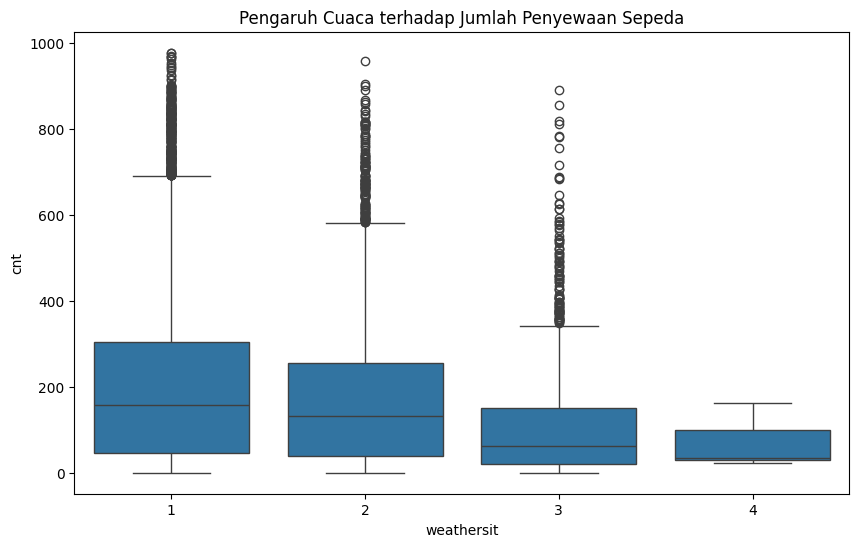

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="weathersit", y="cnt", data=hour_df)
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Boxplot tersebut menunjukkan bahwa penyewaan sepeda paling banyak dilakukan pada cuaca yang cerah.

### Pertanyaan 2: Kapan musim dan hari yang paling baik untuk mempromosikan penyewaan sepeda?

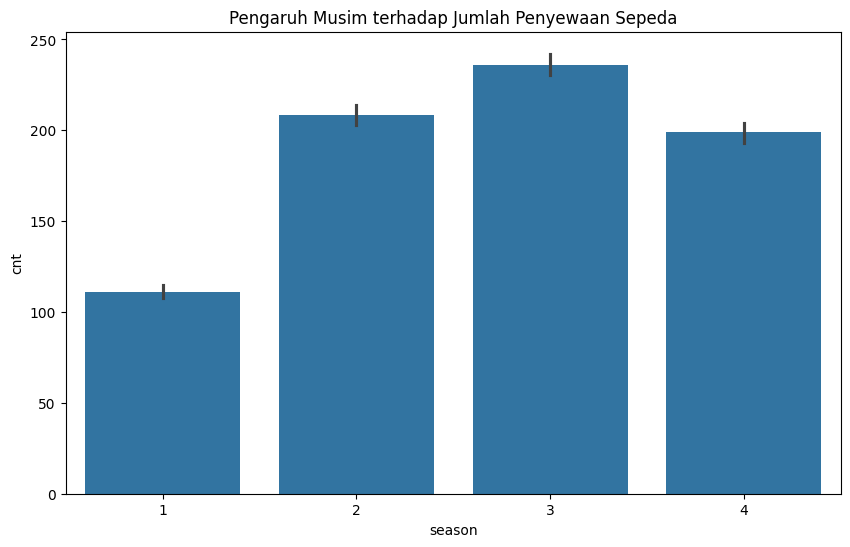

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="season", y="cnt", data=hour_df)
plt.title("Pengaruh Musim terhadap Jumlah Penyewaan Sepeda")
plt.show()

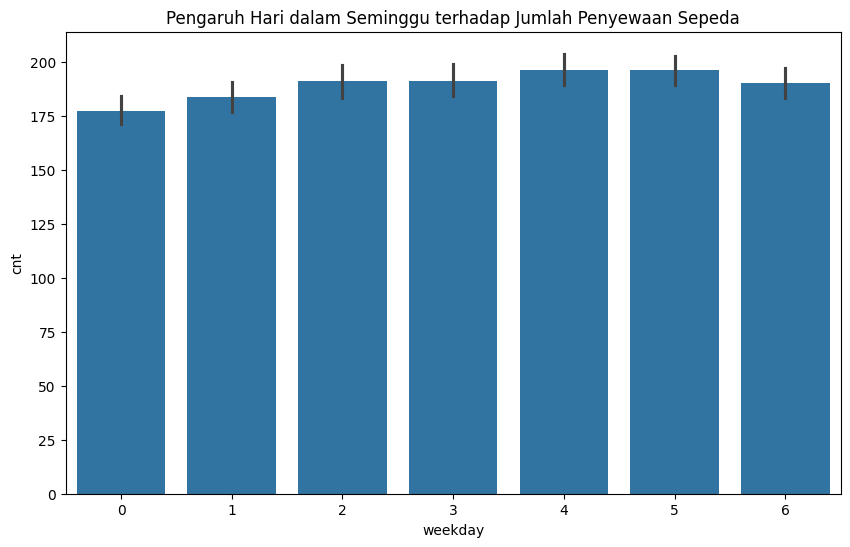

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="weekday", y="cnt", data=hour_df)
plt.title("Pengaruh Hari dalam Seminggu terhadap Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Penyewaan sepeda dilakukan paling banyak pada musim gugur.
- Penyewaan sepeda dilakukan paling banyak pada hari kamis atau jumat.

## Conclusion

- Cuacanya berpengaruh terhadap jumlah penyewa sepeda semakin bagus dan semakin cerah cuacanya akan membuat jumlah penyewaan sepeda menjadi meningkat.
- Berdasarkan analisa dengan menampilkan barplot,promosi penyewaan sepeda paling baik dilakukan pada musim gugur dan pada hari kamis atau jumat. Selain itu, penting untuk memperhatikan cuaca pada saat promosi.

In [ ]:
#menyimpan berkas data yang sudah dibersihkan
hour_df.to_csv("dashboard/main_data.csv", index=False)